<a href="https://colab.research.google.com/github/RE-NY/Assignments_feynn_labs/blob/main/Project2_Feynn_Labs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore") #to ignore any unnecessary warning

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

###Importing the Datasets
There are three datasets.
1. Dataset of the backgrounds of customers of EVs.
2. Dataset of number of charging stations per state in India.
3. Dataset of Specifications and price of EVs based on EV manufacturing compaines in India.


In [3]:
#This is the dataset on the behaviours and backgrounds of users of EV.
df1 = pd.read_csv("/content/behavioural_segment_data.csv")
df1

,Age,Profession,Marrital Status,Education,No of Dependents,Personal loan,Total Salary,Price
0,27,Salaried,Single,Post Graduate,0,Yes,800000,800000
1,35,Salaried,Married,Post Graduate,2,Yes,2000000,1000000
2,45,Business,Married,Graduate,4,Yes,1800000,1200000
3,41,Business,Married,Post Graduate,3,No,2200000,1200000
4,31,Salaried,Married,Post Graduate,2,Yes,2600000,1600000
...,...,...,...,...,...,...,...,...
94,27,Business,Single,Graduate,0,No,2400000,1600000
95,50,Salaried,Married,Post Graduate,3,No,5100000,1600000
96,51,Business,Married,Graduate,2,Yes,2200000,1100000
97,51,Salaried,Married,Post Graduate,2,No,4000000,1500000


In [4]:
#This is the dataset on no of charging stations in states of India
df2 = pd.read_excel("/content/charging_station_data.xlsx")
df2

,State/ UTs,No. of charging stations
0,Maharashtra,317
1,Andhra Pradesh,266
2,Tamil Nadu,281
3,Gujarat,278
4,Uttar Pradesh,207
5,Rajasthan,205
6,Karnataka,172
7,Madhya Pradesh,235
8,West Bengal,141
9,Telangana,138


In [5]:
#This is the dataset on the specifications and price of EVs in India.
df3 = pd.read_excel("/content/3_ev_market_india_dataset.xlsx")
df3

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
0,Tesla,Model 3 Long Range Dual Motor,4.6,233,450,161,940,Yes,AWD,Type 2 CCS,Sedan,D,5,55480
1,Volkswagen,ID.3 Pure,10.0,160,270,167,250,No,RWD,Type 2 CCS,Hatchback,C,5,30000
2,Polestar,2,4.7,210,400,181,620,Yes,AWD,Type 2 CCS,Liftback,D,5,56440
3,BMW,iX3,6.8,180,360,206,560,Yes,RWD,Type 2 CCS,SUV,D,5,68040
4,Honda,e,9.5,145,170,168,190,Yes,RWD,Type 2 CCS,Hatchback,B,4,32997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
99,Audi,e-tron S Sportback 55 quattro,4.5,210,335,258,540,Yes,AWD,Type 2 CCS,SUV,E,5,96050
100,Nissan,Ariya e-4ORCE 63kWh,5.9,200,325,194,440,Yes,AWD,Type 2 CCS,Hatchback,C,5,50000
101,Nissan,Ariya e-4ORCE 87kWh Performance,5.1,200,375,232,450,Yes,AWD,Type 2 CCS,Hatchback,C,5,65000


### Exploratory Data Analysis
Now we preform EDA to extract and present information in these datasets to gain insights about given data

####Analysing the datasets

In [6]:
#Checking the shape of the datasets
print('DF1 Shape: ', df1.shape)
print('DF2 Shape: ', df2.shape)
print('DF3 Shape: ', df3.shape)

DF1 Shape:  (99, 8)
DF2 Shape:  (25, 2)
DF3 Shape:  (103, 14)


In [7]:
# checking the info (columns, datatypes, nulls) of the datasets
print(' <<< DATASET 1 >>>')
print(df1.info())
print(' <<< DATASET 2 >>>')
print(df2.info())
print(' <<< DATASET 3 >>>')
print(df3.info())

 <<< DATASET 1 >>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               99 non-null     int64 
 1   Profession        99 non-null     object
 2   Marrital Status   99 non-null     object
 3   Education         99 non-null     object
 4   No of Dependents  99 non-null     int64 
 5   Personal loan     99 non-null     object
 6   Total Salary      99 non-null     int64 
 7   Price             99 non-null     int64 
dtypes: int64(4), object(4)
memory usage: 6.3+ KB
None
 <<< DATASET 2 >>>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   State/ UTs                25 non-null     object
 1   No. of charging stations  25 non-null     int64 
dtypes: int64(1), object(1)

In [8]:
# getting a statistical summary of the datasets
print('<<< DATASET 1 >>>')
d1 = df1.describe()
print('<<< DATASET 2 >>>')
d2 = df2.describe()
print('<<< DATASET 3 >>>')
d3 = df3.describe()

<<< DATASET 1 >>>
<<< DATASET 2 >>>
<<< DATASET 3 >>>


####Analysis of Charging Stations
Observation: Maharashtra, Tamil Nadu, and Gujarat have highest charging stations while Himachal Pradesh, Andaman and Nicobar Islands have the least.

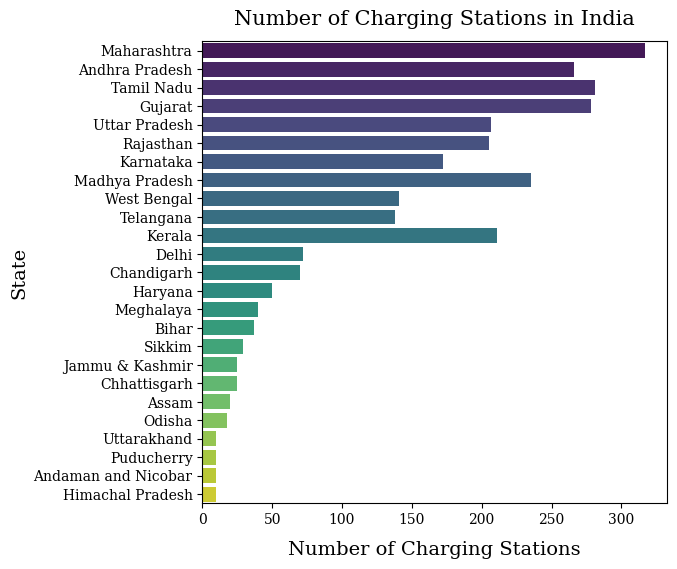

In [9]:
plt.figure(figsize=(6, 6))
sns.barplot(data=df2, y=df2['State/ UTs'].sort_values(ascending=True), x='No. of charging stations', palette='viridis')
plt.ylabel('State', fontsize=14, family='serif')
plt.xlabel('Number of Charging Stations', family='serif', fontsize=14, labelpad=10)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Number of Charging Stations in India', weight=200, family='serif', size=15, pad=12)
plt.show()

####Analysis of EVs based on brands


Observation: Tesla, Audi and Mercedes tops the list of EVs with the maximum number of models in the Indian automobile market.

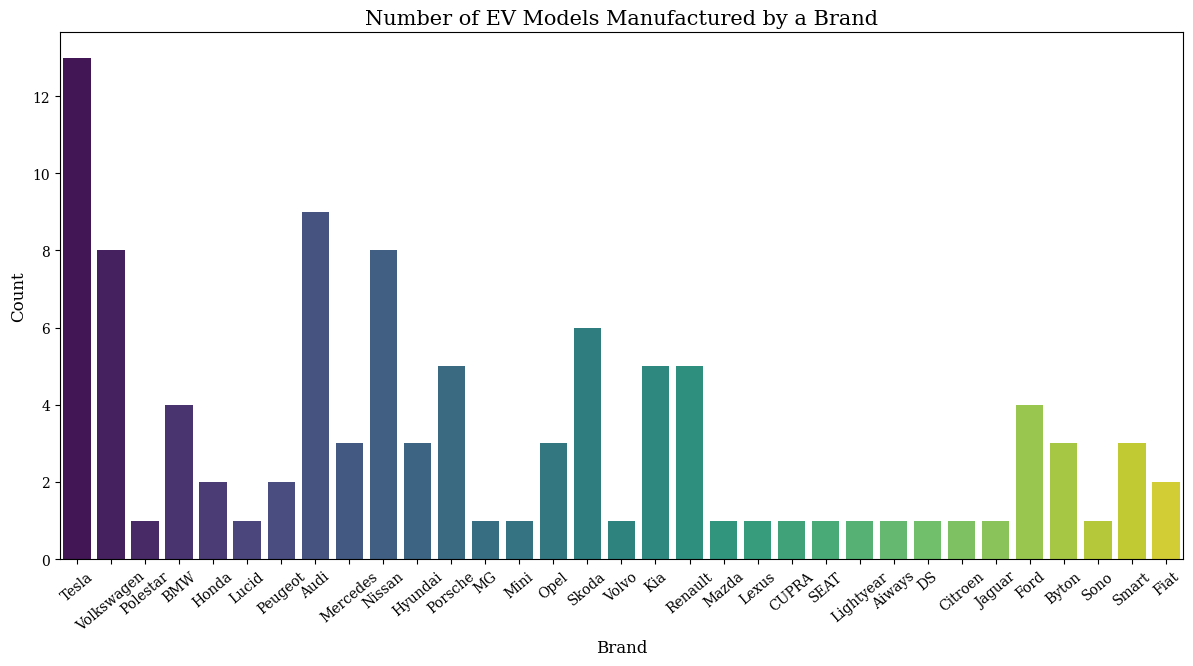

In [10]:
# brand-wise count of EV models
sns.catplot(data=df3, x='Brand', kind='count', palette='viridis', height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Number of EV Models Manufactured by a Brand', family='serif', size=15)
plt.show()

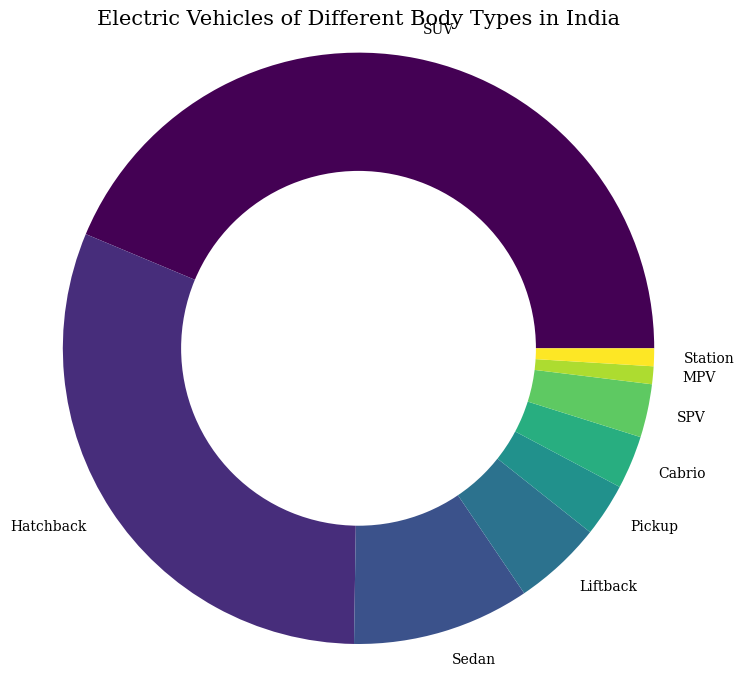

In [11]:
# different body types EVs visualization from dataset 3
x = df3['BodyStyle'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'))
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Body Types in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

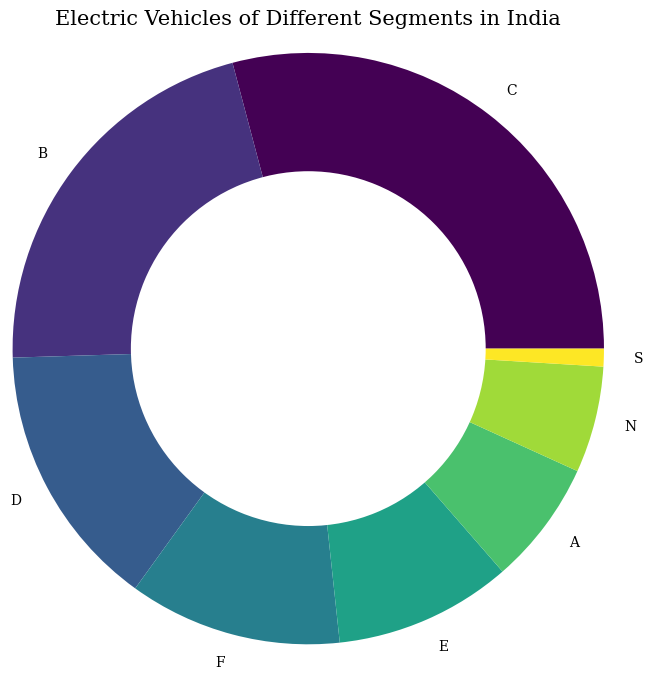

In [12]:

# analysis of different segments of EVs from dataset 3
x = df3['Segment'].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Electric Vehicles of Different Segments in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

####Analysis of Number of Available Seats in EVs

Observation: The majority of electric vehicles (EVs) in India typically come equipped with 5 seats.

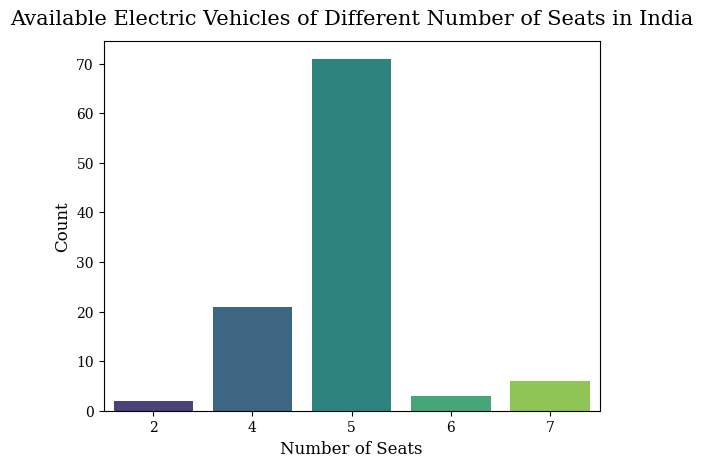

In [13]:
# EVs of different number of seats from dataset 3
sns.countplot(data=df3, x='Seats', palette='viridis')
plt.xlabel('Number of Seats', family='serif', size=12)
plt.ylabel('Count', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title(label='Available Electric Vehicles of Different Number of Seats in India', family='serif', size=15, pad=12)
plt.show()

####Analysis of number of seats in EVs based on brand

Observation: Tesla and Mercedes offer electric vehicles with the maximum number of seats, while Smart contain the least number of seats among EVs.

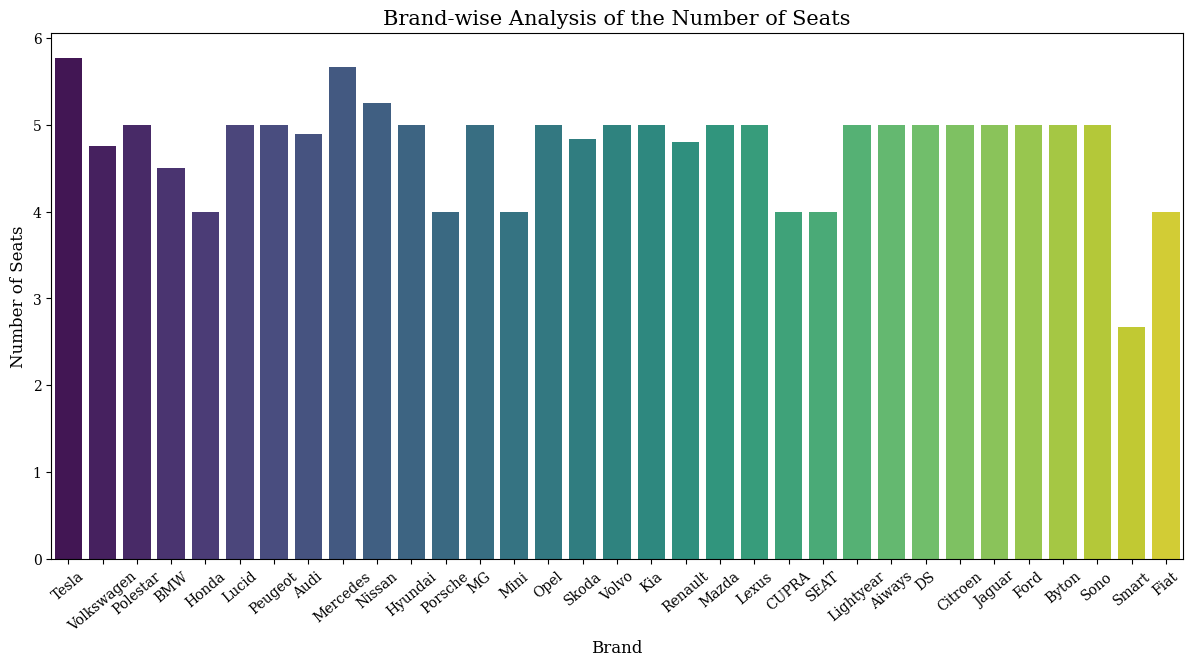

In [14]:
# brand-wise analysis of the number of seats
sns.catplot(kind='bar', data=df3, x='Brand', y='Seats', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Number of Seats', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Number of Seats', family='serif', size=15);

####Analysis of Plug Types in EVs

Observation: EVs with plus type of 'Type 2 CCS' seem to dominate the market while very few EVs contain Type 1 CHAdeMO plugs.

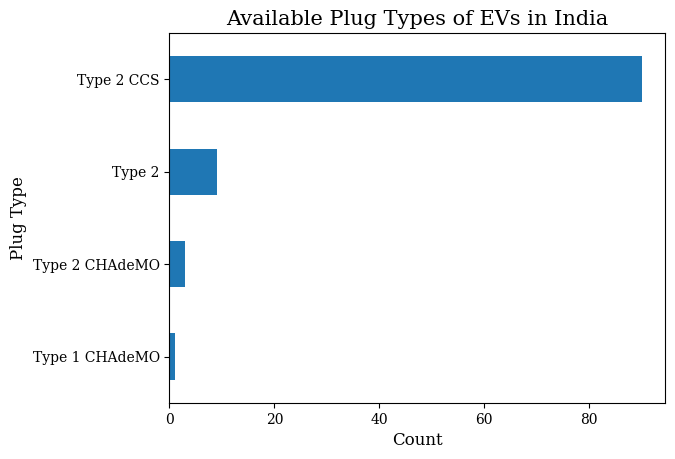

In [15]:
# plug types visualization from dataset 3
df3['PlugType'].value_counts().sort_values(ascending=True).plot.barh()
plt.xlabel('Count', family='serif', size=12)
plt.ylabel('Plug Type', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Available Plug Types of EVs in India', family='serif', size=15)
plt.show()

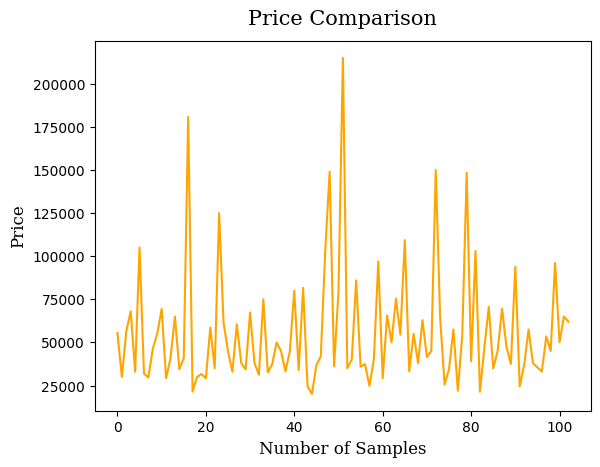

In [16]:
# plotting the price from dataset 3
plt.plot(df3['PriceEuro'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price', family='serif', size=12)
plt.title('Price Comparison', family='serif', size=15, pad=12);


####Analysis of EVs based on accleration

Observation: In terms of acceleration, Renault, SEAT, and Smart EVs emerge as top performers, whereas Tesla, Lucid, and Porsche models don't achieve the same level of acceleration.

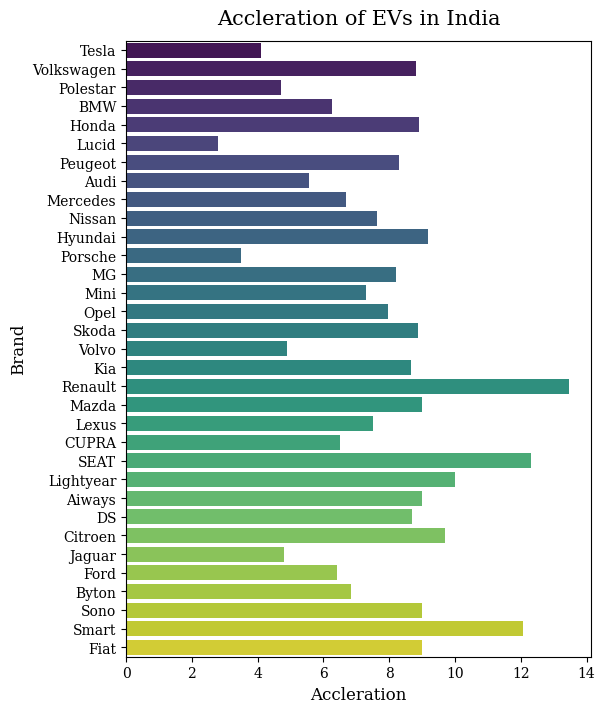

In [17]:
# accleration visualization from dataset 3
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, y='Brand', x='AccelSec', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Accleration', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Accleration of EVs in India', family='serif', size=15, pad=12)
plt.show()

####Analysis of EVs based on Speed

Observation: Based on speed parameter, EVs from Tesla, Lucid and Porsche are the top performers while Renault, Smart, Honda and SEAT don't achieve the same level of speed.

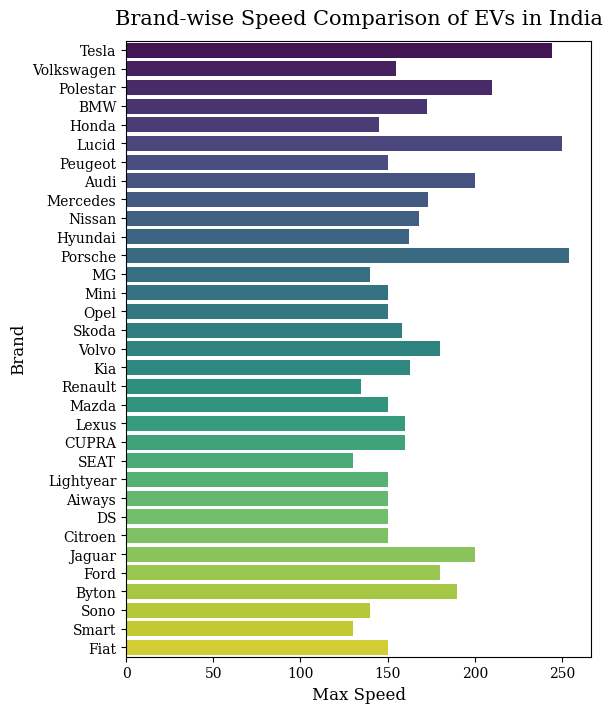

In [18]:
# speed visualization from dataset 3
plt.figure(figsize=(6, 8))
sns.barplot(data=df3, x='TopSpeed_KmH', y='Brand', ci=None, palette='viridis')
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.xlabel('Max Speed', family='serif', size=12)
plt.ylabel('Brand', family='serif', size=12)
plt.title(label='Brand-wise Speed Comparison of EVs in India', family='serif', size=15, pad=12)
plt.show()

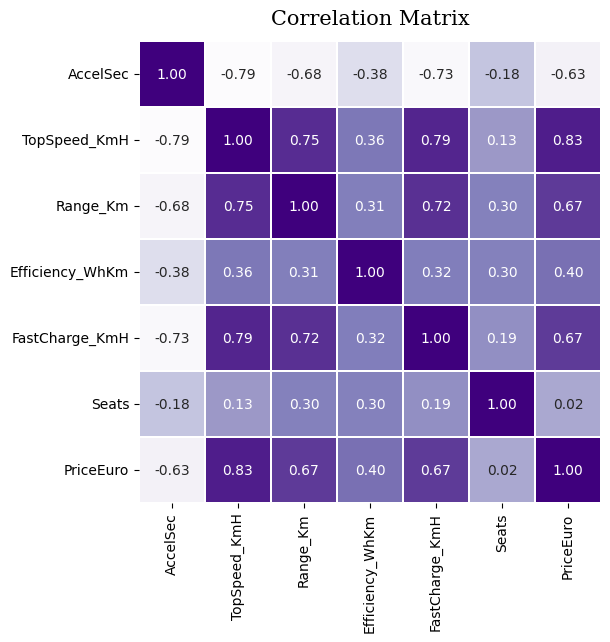

In [19]:
# plotting the correlation matrix from dataset 3
plt.figure(figsize=(6,6))
sns.heatmap(data=df3.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

####Analysis of EVs based on Range Parameter

Observation: Based on range (Km), Lucid, Lightyear and Tesla have the highest range while Honda and Smart have the lowest.

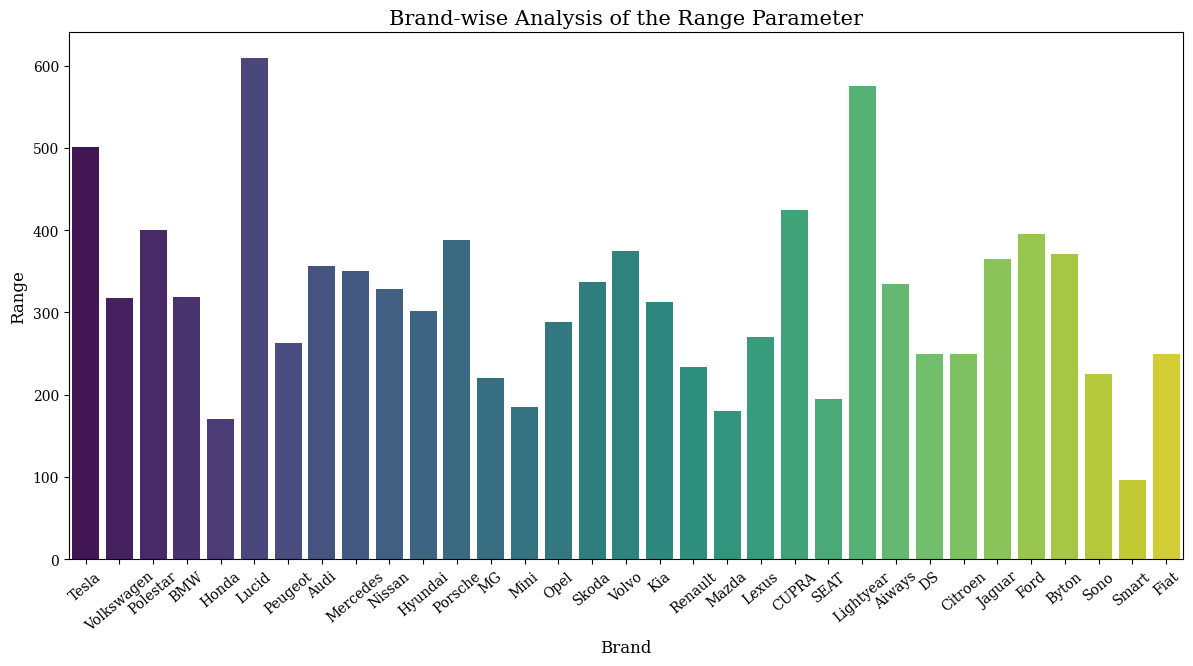

In [20]:
# brand-wise analysis of the range parameter
sns.catplot(kind='bar', data=df3, x='Brand', y='Range_Km', palette='viridis', ci=None, height=6, aspect=2)
sns.despine(right=False, top=False)
plt.tick_params(axis='x', rotation=40)
plt.xlabel('Brand',family='serif', size=12)
plt.ylabel('Range', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.title('Brand-wise Analysis of the Range Parameter', family='serif', size=15);

####Analyzing customers background
Analyzing the Dataset - 1, which is the dataset of behaviours and backgrounds of the customers of EV market.

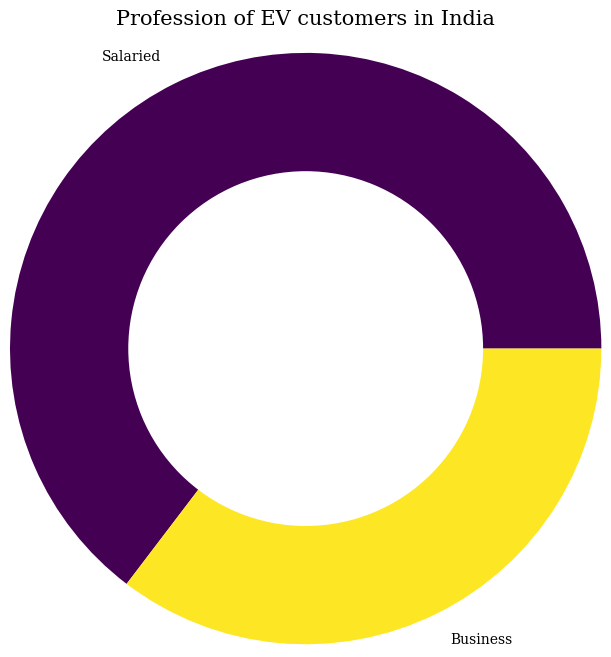

In [21]:
#This represents the distribution of EV customers Profession
x = df1["Profession"].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Profession of EV customers in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()


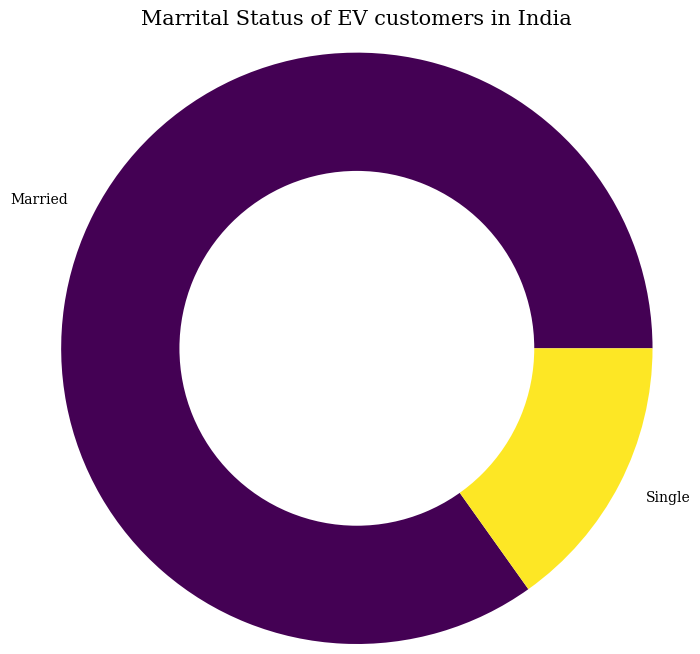

In [22]:
#This represents the distribution of EV customers Marrital Status
x = df1["Marrital Status"].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Marrital Status of EV customers in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

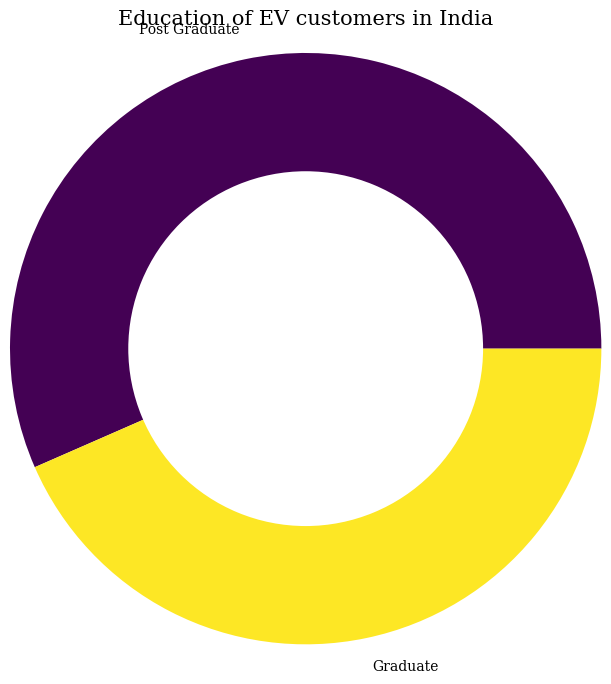

In [23]:
##This represents the distribution of the Education of EV customers
x = df1["Education"].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Education of EV customers in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

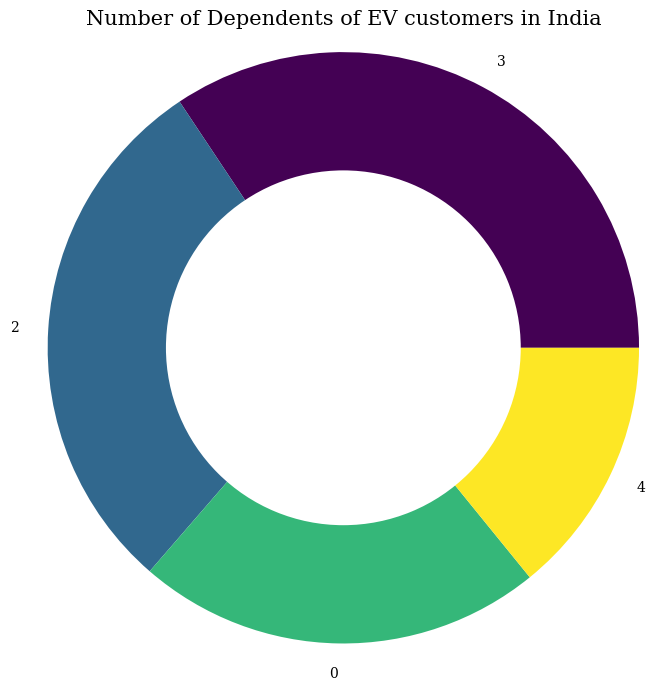

In [24]:
#This represents the distribution of the Number of Dependents of EV customers
x = df1["No of Dependents"].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Number of Dependents of EV customers in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

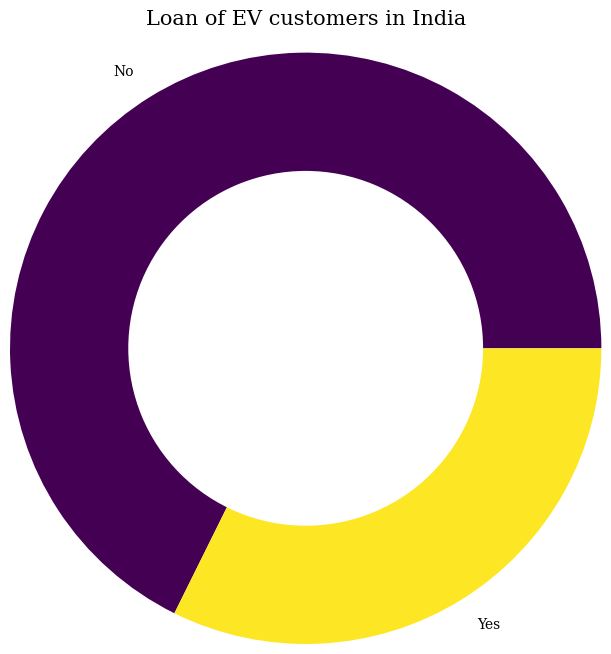

In [25]:
#This represents the distribution whether EV customers have any personal loan or not
x = df1["Personal loan"].value_counts().plot.pie(radius=2, cmap='viridis', startangle=0, textprops=dict(family='serif'), pctdistance=.5)
plt.pie(x=[1], radius=1.2, colors='white')
plt.title(label='Loan of EV customers in India', family='serif', size=15, pad=100)
plt.ylabel('')
plt.show()

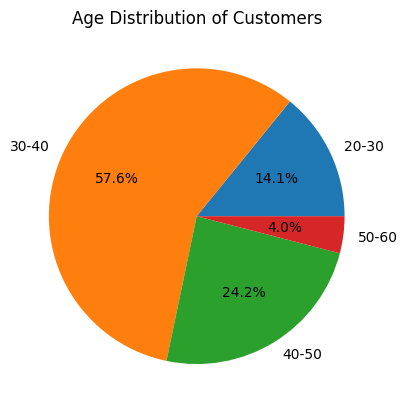

In [26]:
#Representation of the age distribution of EV customers
def age_sizes(ages):
  age_ranges = {
    '20-30': 0,
    '30-40': 0,
    '40-50': 0,
    '50-60': 0
  }
  for age in ages:
    if 20 <= age < 30:
        age_ranges['20-30'] += 1
    elif 30 <= age < 40:
        age_ranges['30-40'] += 1
    elif 40 <= age < 50:
        age_ranges['40-50'] += 1
    elif 50 <= age < 60:
        age_ranges['50-60'] += 1
  return age_ranges

plt.pie(age_sizes(df1["Age"]).values(), labels=age_sizes(df1["Age"]).keys(), autopct='%1.1f%%')

plt.title('Age Distribution of Customers')
plt.show()

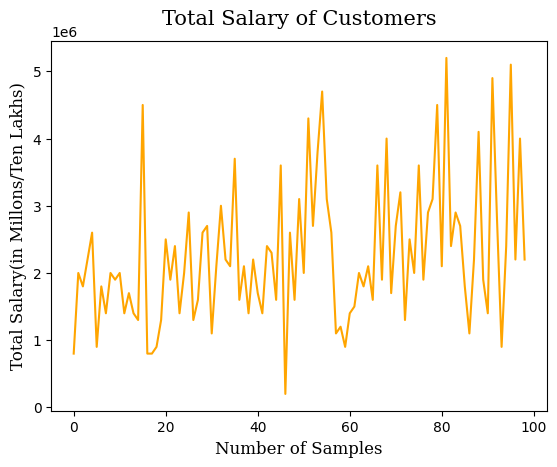

In [27]:
#plotting the Total Salary
plt.plot(df1['Total Salary'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Total Salary(in Millons/Ten Lakhs)', family='serif', size=12)
plt.title('Total Salary of Customers', family='serif', size=15, pad=12);

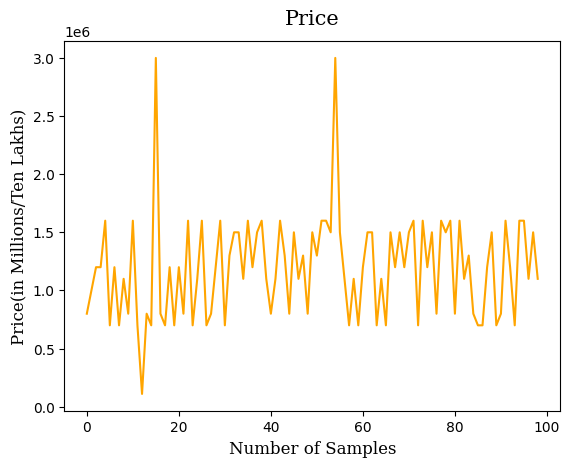

In [28]:
#plotting the Price
#We see most prices are between 7.5 Lakhs and 15 Lakhs
plt.plot(df1['Price'], color='orange')
plt.xlabel('Number of Samples', family='serif', size=12)
plt.ylabel('Price(in Millions/Ten Lakhs)', family='serif', size=12)
plt.title('Price', family='serif', size=15, pad=12);

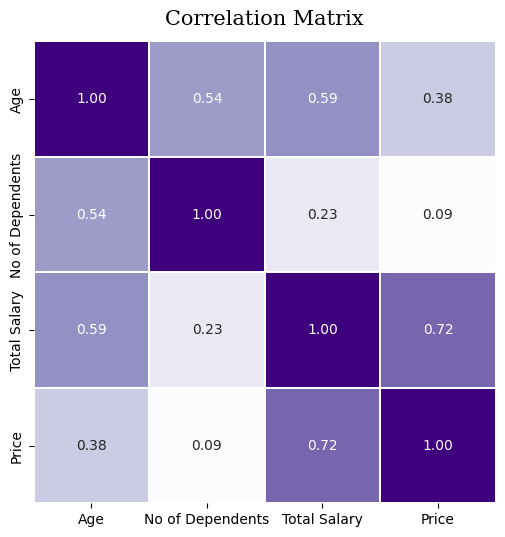

In [29]:
# plotting the correlation matrix from Customers dataset
plt.figure(figsize=(6,6))
sns.heatmap(data=df1.corr(), annot=True, cmap='Purples', cbar=False, square=True, fmt='.2f', linewidths=.3)
plt.title('Correlation Matrix', family='serif', size=15, pad=12);

###Model Building using K-Means Clustering

####Car Segmentation: Categorizing Vehicles for Market Analysis

In [30]:
# encoding the categorical features

# PowerTrain feature
df3['PowerTrain'].replace(to_replace=['RWD','FWD','AWD'],value=[0, 1, 2],inplace=True)

# RapidCharge feature
df3['RapidCharge'].replace(to_replace=['No','Yes'],value=[0, 1],inplace=True)

In [31]:
# selecting features for building a model
X = df3[['AccelSec','TopSpeed_KmH','Efficiency_WhKm','FastCharge_KmH', 'Range_Km', 'RapidCharge', 'Seats', 'PriceEuro','PowerTrain']]


In [32]:
# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [33]:
# applying Principle Component Analysis (PCA)
pca = PCA(n_components=9)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9'])
df_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9
0,2.429225,-0.554599,-1.147772,-0.882791,0.839988,-0.959297,0.998880,0.711148,-0.396662
1,-2.322483,-0.345449,0.896473,-1.305529,0.079598,0.235116,-0.213678,-0.544135,-0.181867
2,1.587851,0.008899,-0.650523,0.041024,0.593537,-0.698248,0.058718,0.248837,-0.202775
3,0.291018,-0.000150,-0.307702,-0.514196,-1.608861,0.291624,0.364999,-0.235543,0.261663
4,-2.602679,-0.626489,-0.888088,0.585294,-0.802108,0.027387,-0.084955,-0.507790,-0.049904


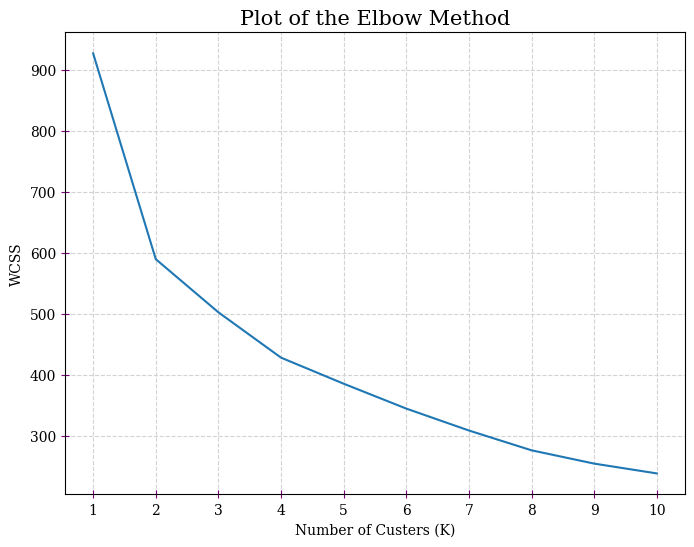

In [34]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()


In [35]:
# training the model using k=4 as rendered by the above plot
kmean = KMeans(n_clusters=4, init='k-means++', random_state=90)
kmean.fit(X_pca)

KMeans(n_clusters=4, random_state=90)

In [36]:
# check the labels assigned to each data point
print(kmean.labels_)


# check the size of clusters
pd.Series(kmean.labels_).value_counts()


# adding a new feature of cluster labels to the dataset 3
df3['clusters'] = kmean.labels_

[0 3 2 1 1 0 3 3 1 2 2 1 1 2 3 1 0 1 3 1 1 2 1 0 0 1 1 2 3 3 2 1 1 2 1 1 1
 3 3 2 0 1 2 1 1 1 1 0 0 3 2 0 1 1 2 1 1 3 1 0 3 2 2 2 3 0 1 2 3 2 1 2 0 2
 1 1 2 3 2 0 1 2 3 1 2 1 2 2 2 1 2 3 3 2 1 1 1 3 1 2 2 2 2]


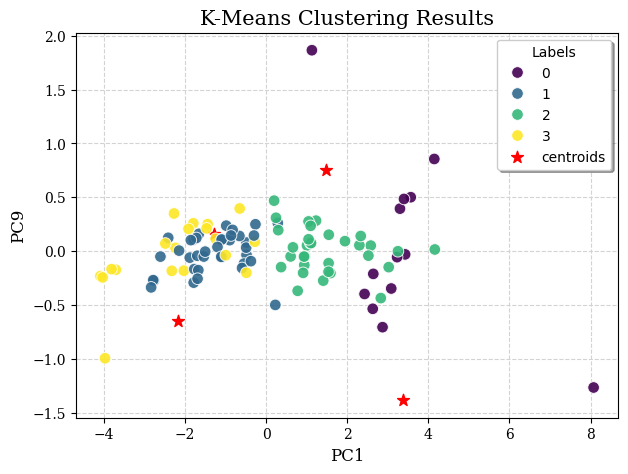

In [37]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC9', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC9', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()

####Segmentation of Customers

In [38]:
# Encoding the categorical features


# Profession feature
df1['Profession'].replace(to_replace=['Salaried', 'Business'],value=[0, 1],inplace=True)

# Marrital Status feature
df1['Marrital Status'].replace(to_replace=['Single', 'Married'],value=[0, 1],inplace=True)

# Education feature
df1['Education'].replace(to_replace=['Graduate', 'Post Graduate'],value=[0, 1],inplace=True)

# Personal loan
df1['Personal loan'].replace(to_replace=['No', 'Yes'],value=[0, 1],inplace=True)


In [39]:
# selecting features for building a model
X = df1[df1.columns]


# feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# applying Principle Component Analysis (PCA)
pca = PCA(n_components=8)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8'])
df_pca.head()


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,-3.456779,0.618798,-1.775729,-0.151357,1.047749,-0.231056,0.256545,-0.154749
1,-0.274146,-0.658946,-1.695786,-0.042108,0.291098,0.405744,-0.405434,-0.339778
2,0.879912,-2.388637,0.925667,-0.363319,1.116538,-0.453815,0.486613,-0.524482
3,0.771649,-0.376038,0.757106,1.685393,0.163439,0.046867,0.143957,-0.072337
4,0.219923,0.252808,-1.513077,-0.399144,0.710610,-0.056085,-1.392625,-0.544492


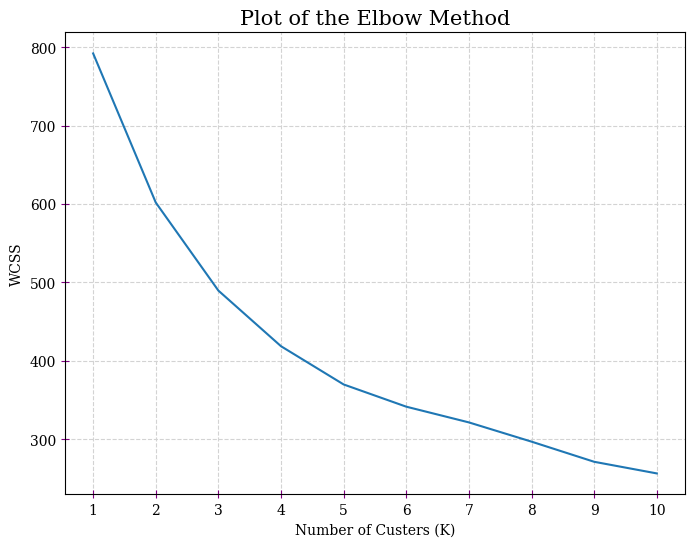

In [40]:
# plotting the results of Elbow

wcss = []

for i in range(1, 11):
  kmean = KMeans(n_clusters=i, init='k-means++', random_state=90)
  kmean.fit(X_pca)
  wcss.append(kmean.inertia_)

plt.figure(figsize=(8,6))
plt.title('Plot of the Elbow Method', size=15, family='serif')
plt.plot(range(1, 11), wcss)
plt.xticks(range(1, 11), family='serif')
plt.yticks(family='serif')
plt.xlabel('Number of Custers (K)', family='serif')
plt.ylabel('WCSS', family='serif')
plt.grid()
plt.tick_params(axis='both', direction='inout', length=6, color='purple', grid_color='lightgray', grid_linestyle='--')
plt.show()

In [41]:
# training the model using k=5 as rendered by the above plot
kmean = KMeans(n_clusters=5, init='k-means++', random_state=90)
kmean.fit(X_pca)


KMeans(n_clusters=5, random_state=90)

In [42]:
# check the labels assigned to each data point
print(kmean.labels_)


# check the size of clusters
pd.Series(kmean.labels_).value_counts()


# adding a new feature of cluster labels to the dataset 3
df1['clusters'] = kmean.labels_

[0 1 4 4 1 1 3 4 4 1 3 1 3 0 1 2 0 0 0 3 3 4 4 4 1 3 1 4 1 3 4 3 2 4 1 2 4
 3 0 3 1 4 3 3 1 3 4 4 3 1 4 2 2 2 2 2 3 0 0 0 0 0 0 1 3 4 4 3 2 4 4 2 3 3
 4 2 1 4 2 2 1 2 1 2 1 1 0 3 3 1 3 2 3 0 0 2 4 2 1]


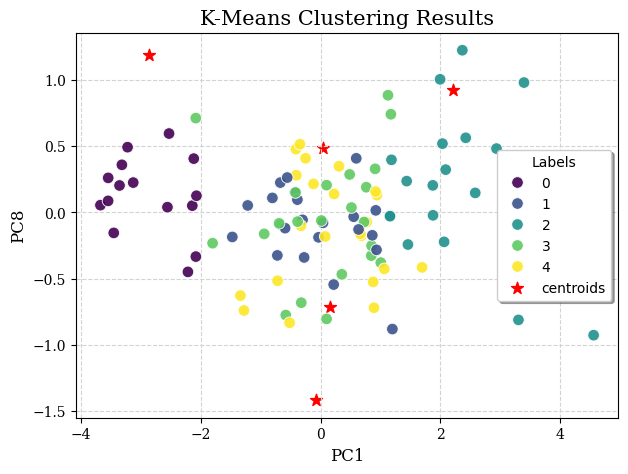

In [43]:
# visualizing clusters
plt.figure(figsize=(7,5))
sns.scatterplot(data=df_pca, x='PC1', y='PC8', s=70, hue=kmean.labels_, palette='viridis', zorder=2, alpha=.9)
plt.scatter(x=kmean.cluster_centers_[:,0], y=kmean.cluster_centers_[:,1], marker="*", c="r", s=80, label="centroids")
plt.xlabel('PC1', family='serif', size=12)
plt.ylabel('PC8', family='serif', size=12)
plt.xticks(family='serif')
plt.yticks(family='serif')
plt.grid()
plt.tick_params(grid_color='lightgray', grid_linestyle='--', zorder=1)
plt.legend(title='Labels', fancybox=True, shadow=True)
plt.title('K-Means Clustering Results', family='serif', size=15)
plt.show()